In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.rename(columns = {'Head Size(cm^3)':'HeadSize','Brain Weight(grams)':'BrainWeight'} , inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   Age Range    237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [6]:
matrix_corr = df.corr()
matrix_corr['BrainWeight'].sort_values(ascending = False)

BrainWeight    1.000000
HeadSize       0.799570
Age Range     -0.169438
Gender        -0.465266
Name: BrainWeight, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c5a0f2110>,
      dtype=object)

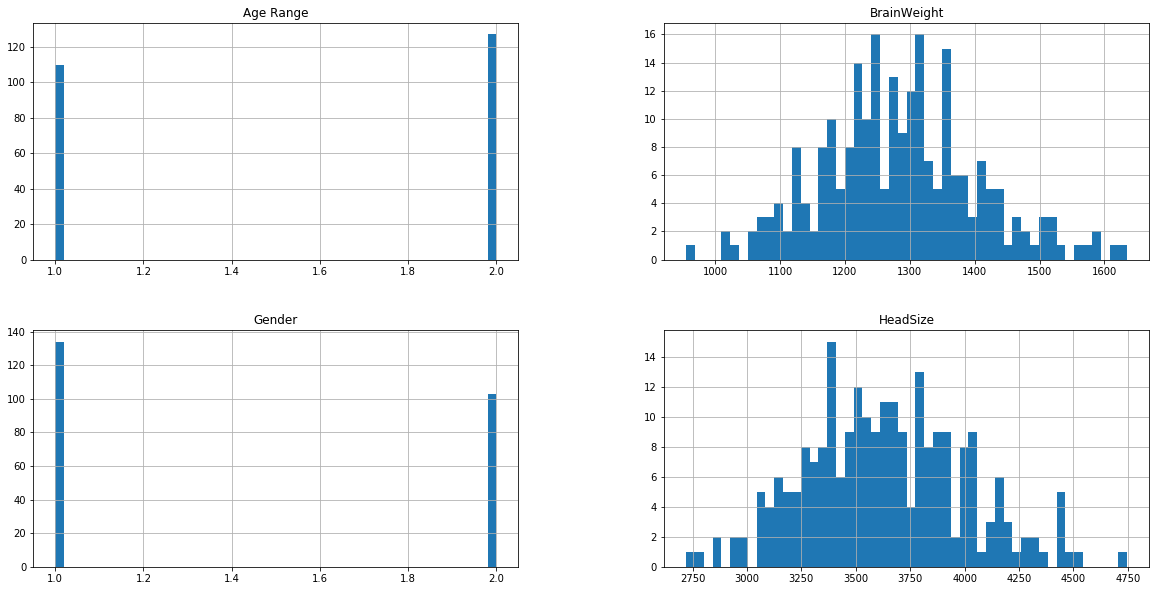

In [7]:
import matplotlib.pyplot as plt 
df.hist(bins = 50 , figsize = (20,10))

In [8]:
features = df.iloc[: , 0:3].values
label = df.iloc[: , -1].values

In [9]:
from sklearn.model_selection import train_test_split
features_train , features_test , label_train , label_test = train_test_split(features , label , test_size = 0.2)

In [10]:
print('Features train size: ' + str(len(features_train)))
print('Features test size : ' + str(len(features_test)))
print('Label train size : '+ str(len(label_train)))
print('Label test size : ' + str(len(label_test)))

Features train size: 189
Features test size : 48
Label train size : 189
Label test size : 48


In [11]:
features_train.shape

(189, 3)

In [12]:
features_test.shape

(48, 3)

In [13]:
label_train.shape

(189,)

In [19]:
features_train.reshape(features_train,-1)
label_train= label_train.reshape(label_train,-1)
features_test = features_test.reshape(features_test,-1)


TypeError: only integer scalar arrays can be converted to a scalar index

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train , label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pred = model.predict(label_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1490 1280 1390 1335 1335 1470 1340 1185 1430 1510 1405 1340 1200 1485
 1012 1090 1226 1195 1120 1125 1375 1280 1250 1235 1290 1360 1324 1120
 1570 1400 1300 1635 1318 1110 1322 1135 1220 1364 1220 1027 1373 1215
 1225 1070 1249 1130 1220 1375].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.